In [1]:
import pandas as pd
import numpy as np
import gc
from sklearn import preprocessing
from IPython.display import clear_output
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from utils.age_utils import transform_age, anti_transform_age
from utils.metrics import evaluate_age_prediction
import matplotlib.pyplot as plt

In [13]:
geo_data_27k = [
    'GSE27317',
    'GSE41037',
    'GSE38873',
    'GSE15745',
    'GSE32393',
    'GSE25892',
    'GSE20242',
    'GSE22595',
    'GSE37988',
    'GSE17448',
    'GSE36642',
    'GSE26126',
    'GSE34035',
    'GSE28746',
    'GSE20236',
    'GSE19711',
    'GSE37008',
    'GSE36812',
    'GSE34257',
    'GSE38608',
    'GSE38291',
    'GSE36166',
    'GSE63384',
    'GSE59274',
    'GSE57285',
    'GSE56606',
    'GSE49908',
    'GSE49907',
    'GSE49905',
    'GSE49904'
]

geo_data_450k = [
    'GSE90124',
    'GSE115797',
    'GSE99624',
    'GSE108213',
    'GSE92767',
    'GSE69176',
    'GSE40360',
    'GSE59157',
    'GSE42861',
    'GSE77241',
    'GSE148000'
]

array_express_27k = [
    'E-GEOD-43256',
    'E-GEOD-64940',
    'E-MTAB-2344',
    'E-GEOD-62867',
    'E-GEOD-44763',
    'E-GEOD-48988',
    'E-GEOD-58119',
    'E-GEOD-58045',
    'E-GEOD-57484',
    'E-GEOD-54211',
    'E-GEOD-56342',
    'E-GEOD-27044',
    'E-GEOD-36194',
    'E-GEOD-21232',
    'E-GEOD-32867',
    'E-GEOD-30759',
    'E-GEOD-30758',
    'E-GEOD-32396',
    'E-GEOD-31979',
    'E-MTAB-625',
    'E-MTAB-487'
]

array_express_450k = [
    'E-MTAB-2372',
    'E-GEOD-73832',
    'E-GEOD-71678',
    'E-GEOD-71245',
    'E-GEOD-83334',
    'E-GEOD-75248',
    'E-GEOD-77955',
    'E-GEOD-67705',
    'E-GEOD-77445',
    'E-GEOD-79056',
    'E-GEOD-72556',
    'E-GEOD-52068',
    'E-GEOD-74738',
    'E-GEOD-76105',
    'E-GEOD-65638',
    'E-GEOD-71955',
    'E-GEOD-63106',
    'E-GEOD-73377',
    'E-GEOD-56515',
    'E-GEOD-73103',
    'E-GEOD-67024',
    'E-GEOD-72338',
    'E-GEOD-59457',
    'E-GEOD-64511',
    'E-GEOD-64495',
    'E-GEOD-59509',
    'E-GEOD-67444',
    'E-GEOD-62219',
    'E-GEOD-51954',
    'E-GEOD-52588',
    'E-GEOD-36054',
    'E-GEOD-50660',
    'E-GEOD-61259',
    'E-GEOD-61258',
    'E-GEOD-61257',
    'E-GEOD-61454',
    'E-GEOD-61380',
    'E-GEOD-61107',
    'E-GEOD-54690',
    'E-GEOD-49149',
    'E-GEOD-55438',
    'E-GEOD-53740',
    'E-GEOD-57767',
    'E-GEOD-49064',
    'E-GEOD-50759',
    'E-GEOD-56553',
    'E-GEOD-54399',
    'E-GEOD-53162',
    'E-GEOD-53128',
    'E-GEOD-50498',
    'E-GEOD-47513',
    'E-GEOD-49393',
    'E-GEOD-39004',
    'E-GEOD-51388',
    'E-GEOD-51032',
    'E-GEOD-48325',
    'E-GEOD-44712',
    'E-GEOD-45461',
    'E-GEOD-40279',
    'E-GEOD-41169',
    'E-GEOD-32149',
    'E-GEOD-41826',
    'E-GEOD-42700',
    'E-GEOD-32146',
    'E-GEOD-30870',
    'E-GEOD-34639',
    'E-GEOD-63347',
    'E-GEOD-59592'
]

tcga_all = [
    'TGCA_LUSC',
    'TGCA_THCA',
    'TGCA_HNSC',
    'TGCA_KIRC',
    'TGCA_KIRP',
    'TGCA_LUAD',
    'TGCA_PRAD',
    'TGCA_STAD',
    'TGCA_COAD',
    'TGCA_LIHC',
    'TGCA_UCEC',
    'TGCA_BRCA'
]

cancer_data = [
    'GSE32393',
    'GSE37988',
    'GSE26126',
    'GSE63384',
    'GSE59157',
    'E-GEOD-32867',
    'E-GEOD-30759',
    'E-GEOD-31979',
    'E-GEOD-77955',
    'E-GEOD-52068',
    'E-GEOD-49149',
    'E-GEOD-39004'
]

cancer_comparison = [
    'GSE53051',
]

reliability = [
    'GSE55763',
]

rejuvenation = [
    'GSE142439',
    'GSE116754',
    'GSE65214',
    'GSE44430',
    'GSE45727',
    'GSE30653',
    'GSE37066',
    'GSE30456',
]

senescence_analysis = [
    'GSE91069',
    'GSE100249'
]

data_27k = np.concatenate([np.array(geo_data_27k), np.array(array_express_27k)])
data_450k = np.concatenate([np.array(geo_data_450k), np.array(array_express_450k)])
geo_data = np.concatenate([data_27k, data_450k])
tcga_all = np.array(tcga_all)
all_data = np.concatenate([data_27k, data_450k, tcga_all])

#load all train data for model training
count = 0
for dataset in all_data:
    print(dataset)
    if count == 0:
        all_train = pd.read_pickle('../data_train/' + dataset + '.pkl')
        count += 1
    else:
        new_df = pd.read_pickle('../data_train/' + dataset + '.pkl')
        all_train = pd.concat([all_train, new_df], join ='inner')
        gc.collect()
    clear_output()

#load all test data
count = 0
for dataset in all_data:
    print(dataset)
    if count == 0:
        all_test = pd.read_pickle('../data_test/' + dataset + '.pkl')
        count += 1
    else:
        new_df = pd.read_pickle('../data_test/' + dataset + '.pkl')
        all_test = pd.concat([all_test, new_df], join ='inner')
        gc.collect()
    clear_output()

In [14]:
multi_platform_cpgs = np.array(pd.read_pickle('../dependencies/multi_platform_cpgs.pkl'))

#extracting age and removing unimportant columns
train_ages = all_train['age'].astype('float64')
test_ages = all_test['age'].astype('float64')

train_info = all_train[['dataset', 'tissue_type', 'age', 'gender']]
test_info = all_test[['dataset', 'tissue_type', 'age', 'gender']]

train = all_train[multi_platform_cpgs]
test = all_test[multi_platform_cpgs]

train_cols = train.columns
train_index = train.index

test_cols = test.columns
test_index = test.index

#scaling the data so each columns has 0 mean and variance 1
scaler = preprocessing.RobustScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(train), index = train_index, columns = train_cols)
test_scaled = pd.DataFrame(scaler.transform(test), index = test_index, columns = test_cols)

In [191]:
correlations = train.apply(lambda col: col.corr(train_ages))
top_cpgs = correlations.abs().sort_values(ascending=False).head(1000).index
train_reduced = train[top_cpgs]


# Best models

In [15]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(train, transform_age(train_ages))

LinearRegression()

In [17]:
predicted_ages = anti_transform_age(linear_regression_model.predict(test))

# Performance
results_linear = evaluate_age_prediction(test_ages, predicted_ages, cpg_count=len(train_cols), model_name="Linear Regression")
print(results_linear.round(3))

               Model   CpGs    MAD   MAE     MSE  Pearson R  Median Error
0  Linear Regression  20318  3.455  5.16  61.511      0.959         0.019


In [18]:
ridge = Ridge(alpha=10.0)
ridge.fit(train, transform_age(train_ages))

Ridge(alpha=10.0)

In [19]:
ridge_predictions = anti_transform_age(ridge.predict(test))

results_ridge = evaluate_age_prediction(test_ages, ridge_predictions, model_name="Ridge Regression", cpg_count=np.sum(ridge.coef_ > 0))
print(results_ridge.round(3))

              Model  CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  Ridge Regression  9994  2.412  3.687  33.234      0.977         0.009


C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

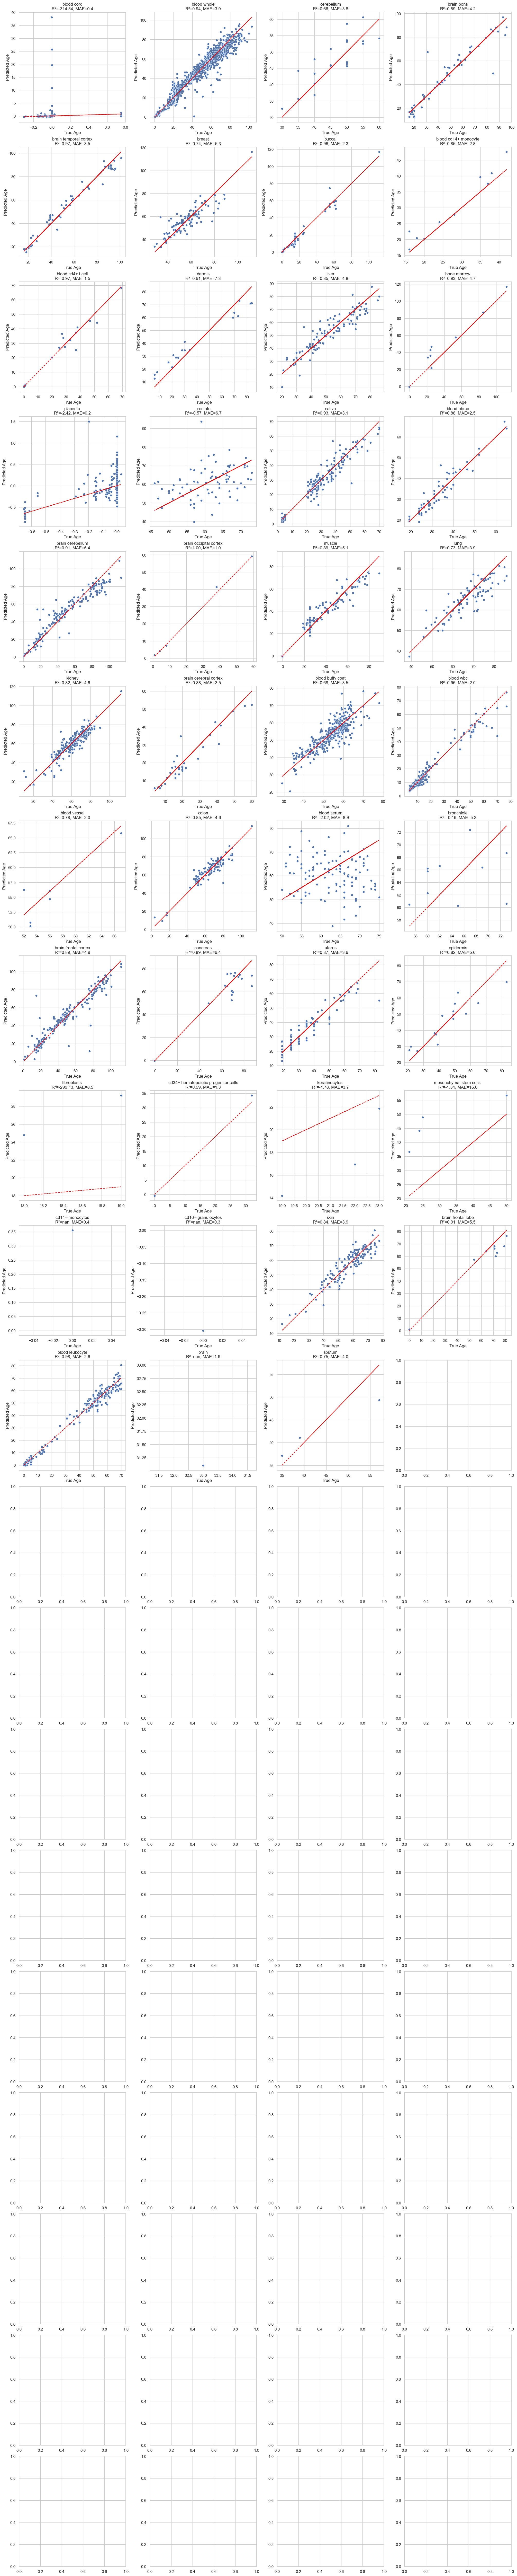

In [23]:
import importlib
from utils import visualization

importlib.reload(visualization)
from utils.visualization import plot_predicted_vs_true_by_tissue

plot_predicted_vs_true_by_tissue(
    test_info=test_info,
    true_ages=test_ages,
    predicted_ages=ridge_predictions,
    title="Rtest"
)

In [186]:
import pandas as pd
import numpy as np

# Get coefficients and CpG site names
ridge_coefs = pd.Series(ridge.coef_, index=train.columns)

# Sort by absolute value (importance)
important_cpgs = ridge_coefs.abs().sort_values(ascending=False)

# Show top N CpGs
print("Top 10 influential CpG sites in Ridge Regression:")
print(important_cpgs.head(10000))

threshold = 0.01  # adjust based on scale
selected_cpgs = ridge_coefs[abs(ridge_coefs) > threshold]

print(f"Selected {len(selected_cpgs)} CpG sites with |coef| > {threshold}")
print(selected_cpgs)



Top 10 influential CpG sites in Ridge Regression:
cg22736354   0.40735
cg12373771   0.35562
cg06493994   0.30176
cg06144905   0.29365
cg22809047   0.24691
               ...  
cg23993660   0.01608
cg18428217   0.01608
cg01400401   0.01608
cg07355551   0.01608
cg17982504   0.01607
Length: 10000, dtype: float64
Selected 13233 CpG sites with |coef| > 0.01
cg00003994    0.05423
cg00007981    0.03120
cg00011459   -0.03975
cg00012199    0.01416
cg00013618   -0.01230
               ...   
cg27653134   -0.02455
cg27655905   -0.01304
cg27662379   -0.01289
cg27662877    0.04961
cg27665659    0.12944
Length: 13233, dtype: float64


In [25]:
lasso = Lasso(alpha=0.001)
lasso.fit(train_scaled, transform_age(train_ages))

C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e+02, tolerance: 2.983e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [26]:
lasso_predictions = anti_transform_age(lasso.predict(test_scaled))

results_lasso = evaluate_age_prediction(test_ages, lasso_predictions, model_name="Lasso", cpg_count=np.sum(lasso.coef_ != 0))
print(results_lasso.round(3))

   Model  CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  Lasso  3967  2.753  4.169  42.767      0.971         0.027


In [27]:
elasticNet = ElasticNet(alpha=0.01, l1_ratio=0.2)
elasticNet.fit(train_scaled, transform_age(train_ages))

C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.812e+02, tolerance: 2.983e+00
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.01, l1_ratio=0.2)

In [28]:
elasticNet_predictions = anti_transform_age(elasticNet.predict(test_scaled))

results_elasticNet = evaluate_age_prediction(test_ages, elasticNet_predictions, model_name="ElasticNet scaled", cpg_count=np.sum(elasticNet.coef_ != 0))
print(results_elasticNet.round(4))

elas_cpgs = train_scaled.columns[elasticNet.coef_ != 0]

               Model  CpGs     MAD     MAE      MSE  Pearson R  Median Error
0  ElasticNet scaled  2551  2.6202  3.9702  38.4007     0.9739        0.0158


In [58]:
import importlib
from utils import visualization
importlib.reload(visualization)
from utils.visualization import plot_feature_importance

C:\Users\elena\PycharmProjects\rp-delft\utils\visualization.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  # Sort by absolute importance and keep top_n


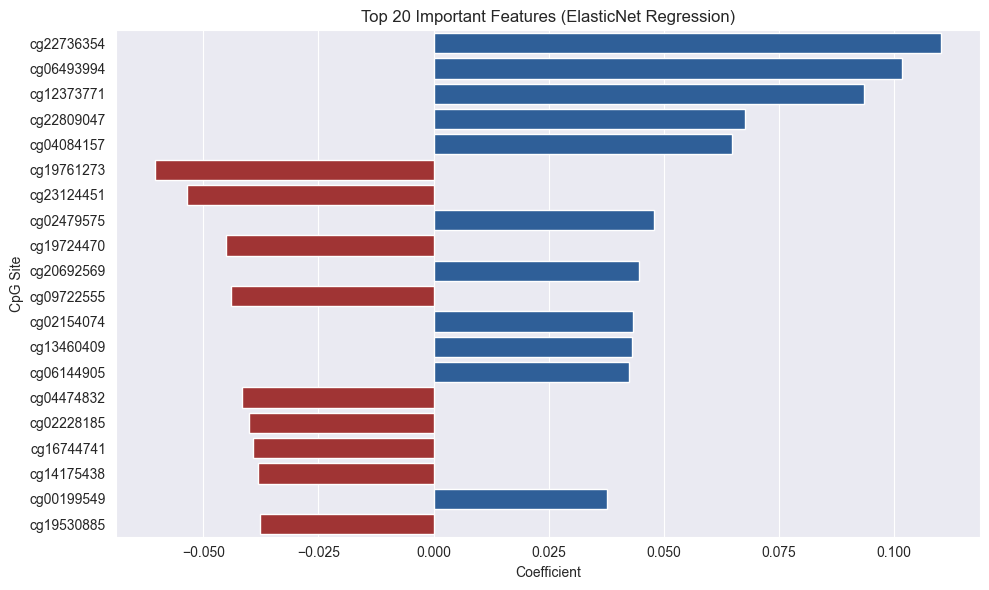

C:\Users\elena\PycharmProjects\rp-delft\utils\visualization.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  # Sort by absolute importance and keep top_n


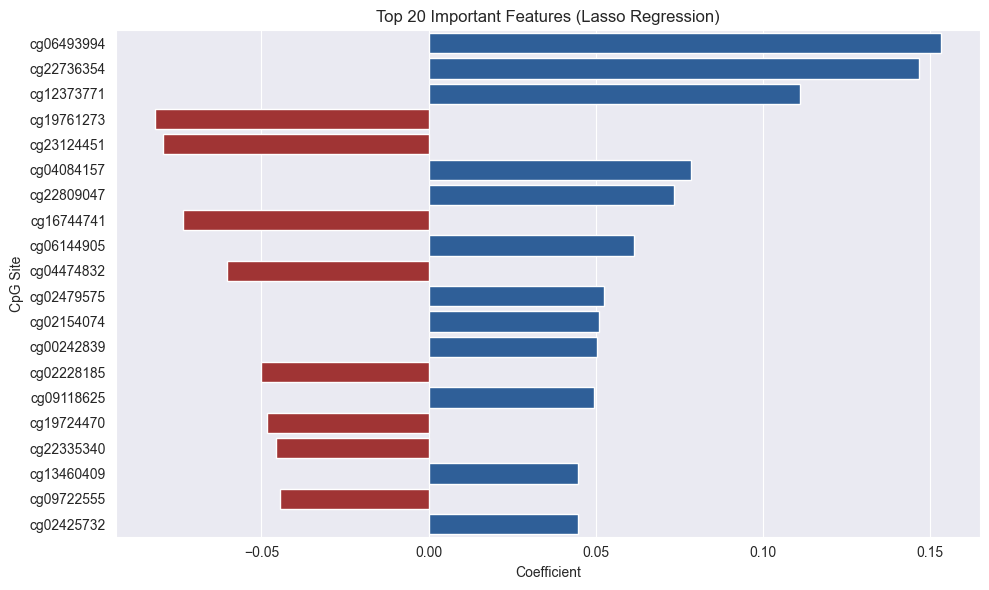

C:\Users\elena\PycharmProjects\rp-delft\utils\visualization.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  # Sort by absolute importance and keep top_n


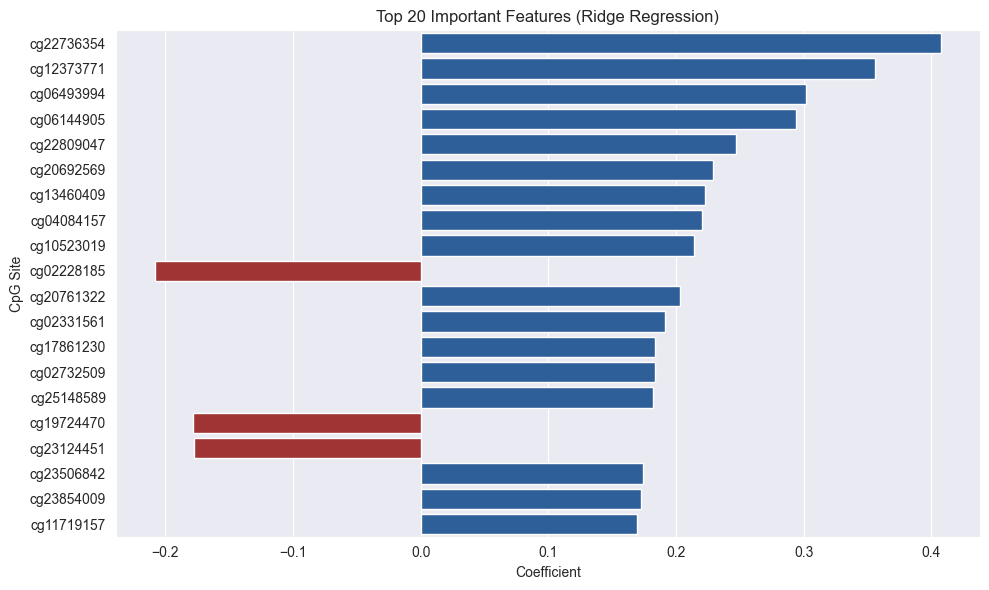

C:\Users\elena\PycharmProjects\rp-delft\utils\visualization.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  # Sort by absolute importance and keep top_n


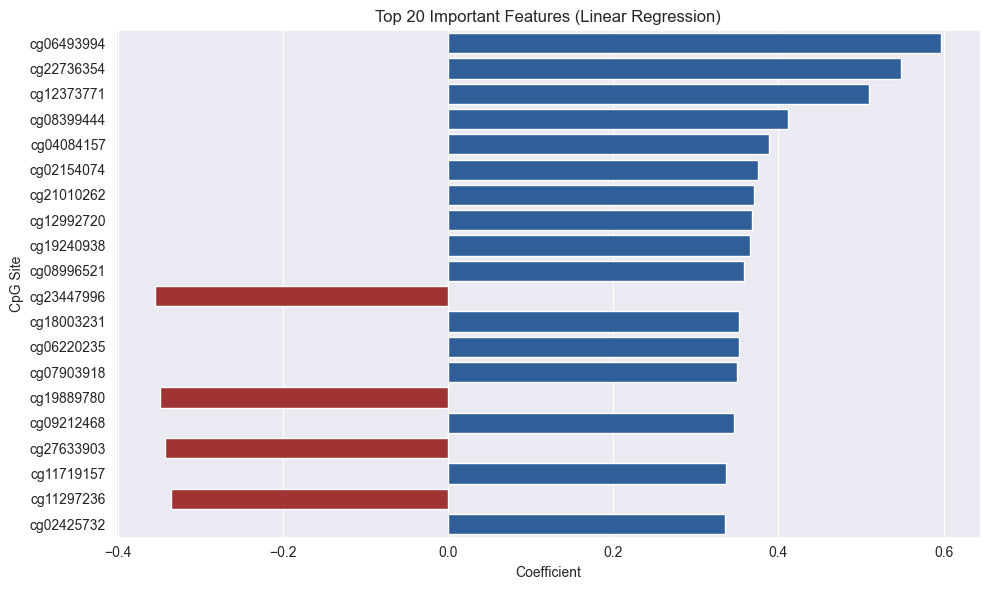

,Feature,Importance,AbsImportance
4703,cg06493994,0.596479,0.596479
16693,cg22736354,0.548135,0.548135
8978,cg12373771,0.509647,0.509647
6057,cg08399444,0.411702,0.411702
3004,cg04084157,0.388903,0.388903
1557,cg02154074,0.375624,0.375624
15394,cg21010262,0.370985,0.370985
9441,cg12992720,0.368566,0.368566
14120,cg19240938,0.365945,0.365945
6488,cg08996521,0.357783,0.357783


In [59]:
plot_feature_importance(elasticNet, feature_names=train_cols,  top_n=20, title='Top 20 Important Features (ElasticNet Regression)')
plot_feature_importance(lasso, feature_names=train.columns, top_n=20, title='Top 20 Important Features (Lasso Regression)')
plot_feature_importance(ridge, feature_names=train.columns, top_n=20, title='Top 20 Important Features (Ridge Regression)')
plot_feature_importance(linear_regression_model, feature_names=train.columns, top_n=20, title='Top 20 Important Features (Linear Regression)')

In [91]:
top_elasticnet = plot_feature_importance(elasticNet, feature_names=train.columns, top_n=1000, plot=False)
top_lasso = plot_feature_importance(lasso, feature_names=train.columns, top_n=1000, plot=False)
top_ridge = plot_feature_importance(ridge, feature_names=train.columns, top_n=1000, plot=False)
top_linear = plot_feature_importance(linear_regression_model, feature_names=train.columns, top_n=1000, plot=False)

elasticnet_features = set(top_elasticnet['Feature'])
lasso_features = set(top_lasso['Feature'])
ridge_features = set(top_ridge['Feature'])
linear_features = set(top_linear['Feature'])

overlapping_all = elasticnet_features & lasso_features & ridge_features & linear_features

print("Overlapping CpG sites across all models:")
print(overlapping_all)


Overlapping CpG sites across all models:
{'cg23124451', 'cg13547237', 'cg25361844', 'cg06718696', 'cg26904406', 'cg12315959', 'cg17758721', 'cg17904068', 'cg19761273', 'cg23696886', 'cg27665659', 'cg00242839', 'cg16537367', 'cg15059932', 'cg01593385', 'cg07651914', 'cg04456238', 'cg11065385', 'cg04474832', 'cg21232015', 'cg10753073', 'cg19560758', 'cg09212468', 'cg02317907', 'cg17500962', 'cg14175438', 'cg18267374', 'cg04836038', 'cg09118625', 'cg01137065', 'cg19497444', 'cg02154074', 'cg09599653', 'cg12373771', 'cg13316191', 'cg15979932', 'cg11821147', 'cg03734783', 'cg06493994', 'cg22915732', 'cg12992720', 'cg22335340', 'cg11279021', 'cg02479575', 'cg06580318', 'cg20775254', 'cg18670235', 'cg08948050', 'cg14060828', 'cg26852159', 'cg04582295', 'cg24081819', 'cg19240938', 'cg22461835', 'cg01843018', 'cg11953824', 'cg25781123', 'cg21358381', 'cg25256723', 'cg23060239', 'cg11136562', 'cg22809047', 'cg04999691', 'cg18573383', 'cg10523019', 'cg05149586', 'cg08359956', 'cg06638012', 'cg198

In [29]:
# Step 1: Evaluate each model
results = []

results.append(evaluate_age_prediction(test_ages, predicted_ages, model_name="Linear regression", cpg_count=20318))
results.append(evaluate_age_prediction(test_ages, ridge_predictions, model_name="Ridge regression", cpg_count=20318))
results.append(evaluate_age_prediction(test_ages, lasso_predictions, model_name="Lasso regression", cpg_count=20318))
results.append(evaluate_age_prediction(test_ages, elasticNet_predictions, model_name="ElasticNetCV", cpg_count=20318))

# Step 2: Combine into one DataFrame
all_results = pd.concat(results, ignore_index=True)

# Step 3: Bold best scores
def bold_best(s, maximize=False):
    if maximize:
        is_best = s == s.max()
    else:
        is_best = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_best]

styled_table = (
    all_results.style
    .apply(bold_best, subset=['MAD'], maximize=False)
    .apply(bold_best, subset=['MAE'], maximize=False)
    .apply(bold_best, subset=['MSE'], maximize=False)
    .apply(bold_best, subset=['Pearson R'], maximize=True)
    .apply(bold_best, subset=['Median Error'], maximize=False)
)

styled_table


,Model,CpGs,MAD,MAE,MSE,Pearson R,Median Error
0,Linear regression,20318,3.455275,5.159696,61.511152,0.958792,0.019075
1,Ridge regression,20318,2.411616,3.686716,33.233970,0.977453,0.008723
2,Lasso regression,20318,2.752963,4.168844,42.767181,0.970948,0.027384
3,ElasticNetCV,20318,2.620175,3.970158,38.400678,0.973921,0.015825


# SHAP analysis

In [82]:
import shap

explainer_linear = shap.Explainer(linear_regression_model, train, feature_names=train_cols)
explainer_lasso = shap.Explainer(lasso, train, feature_names=train_cols)
explainer_ridge = shap.Explainer(ridge, train, feature_names=train_cols)
explainer_elasticNet = shap.Explainer(elasticNet, train, feature_names=train_cols)

shap_values_linear = explainer_linear(test)
shap_values_lasso = explainer_lasso(test)
shap_values_ridge = explainer_ridge(test)
shap_values_elasticNet = explainer_elasticNet(test)

LinearExplainer explainer: 5456it [00:26, 140.93it/s]                           


In [128]:
def get_top_shap_features(shap_values, feature_names, top_n=20):
    """Return top N features with highest mean absolute SHAP values."""
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
    top_indices = np.argsort(mean_abs_shap)[-top_n:][::-1]
    return set(np.array(feature_names)[top_indices])

# Get top SHAP features for each model
top_linear = get_top_shap_features(shap_values_linear, train.columns, top_n=1000)
top_lasso = get_top_shap_features(shap_values_lasso, train.columns, top_n=1000)
top_ridge = get_top_shap_features(shap_values_ridge, train.columns, top_n=1000)
top_elastic = get_top_shap_features(shap_values_elasticNet, train.columns, top_n=1000)

# Intersection
intersection = top_linear & top_lasso & top_ridge & top_elastic

print("Overlapping top SHAP features in all models:", intersection)


Overlapping top SHAP features in all models: {'cg23320649', 'cg23124451', 'cg13547237', 'cg03395898', 'cg19761273', 'cg23696886', 'cg27132814', 'cg16537367', 'cg00242839', 'cg23566503', 'cg01593385', 'cg07651914', 'cg04456238', 'cg01402255', 'cg07239938', 'cg21232015', 'cg18573251', 'cg10753073', 'cg18888403', 'cg09212468', 'cg02317907', 'cg22947000', 'cg17500962', 'cg05790038', 'cg09118625', 'cg19497444', 'cg12373771', 'cg11105610', 'cg23208881', 'cg06493994', 'cg12992720', 'cg22335340', 'cg10923408', 'cg20775254', 'cg16834187', 'cg10287137', 'cg01843018', 'cg11953824', 'cg17349199', 'cg27210390', 'cg25256723', 'cg19238840', 'cg22809047', 'cg04999691', 'cg21745164', 'cg06378617', 'cg05149586', 'cg05473677', 'cg08359956', 'cg19889780', 'cg22736354', 'cg04084157', 'cg02732509', 'cg17655614', 'cg14894144', 'cg08418111', 'cg23207527', 'cg17063929', 'cg09809672', 'cg08072716', 'cg08965235', 'cg22920417', 'cg19530885', 'cg22197830', 'cg14244577', 'cg00311768', 'cg01262913', 'cg19724470', 'c

In [106]:
top_all = intersection & overlapping_all
print(top_all)
top_array = np.array(list(top_all))
top_array = np.array(list(top_ridge))

{'cg19889780', 'cg22736354', 'cg23124451', 'cg13547237', 'cg04084157', 'cg11719157', 'cg06493994', 'cg12992720', 'cg22335340', 'cg02732509', 'cg17655614', 'cg06144905', 'cg19761273', 'cg13460409', 'cg23696886', 'cg22654935', 'cg00739120', 'cg14894144', 'cg25148589', 'cg19114595', 'cg16537367', 'cg00242839', 'cg20775254', 'cg20582779', 'cg01593385', 'cg07651914', 'cg04456238', 'cg13351161', 'cg21232015', 'cg17861230', 'cg21418052', 'cg10986043', 'cg10753073', 'cg01843018', 'cg11953824', 'cg08072716', 'cg08965235', 'cg01087382', 'cg09212468', 'cg02317907', 'cg25256723', 'cg19530885', 'cg17500962', 'cg03143849', 'cg15976539', 'cg22197830', 'cg13269964', 'cg14244577', 'cg22809047', 'cg09118625', 'cg04999691', 'cg01262913', 'cg02228185', 'cg19724470', 'cg22686523', 'cg19497444', 'cg12373771', 'cg05149586', 'cg22407504', 'cg14871138', 'cg08359956'}


In [80]:
# print(shap_values.values.min(), shap_values.values.max())
# import matplotlib.pyplot as plt
# # Create beeswarm plot
# shap.plots.beeswarm(shap_values, show=False)  # `show=False` prevents it from auto-rendering
#
# # Zoom in: set x-axis limits
# plt.xlim(-1, 1)  # Change this to zoom as needed
# plt.show()


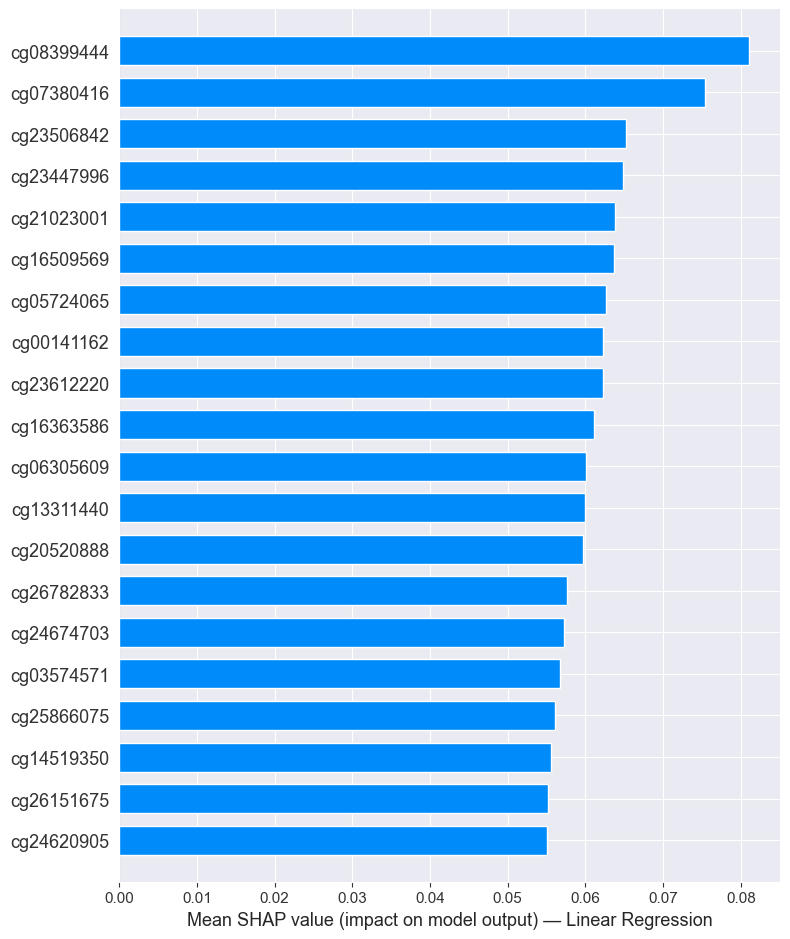

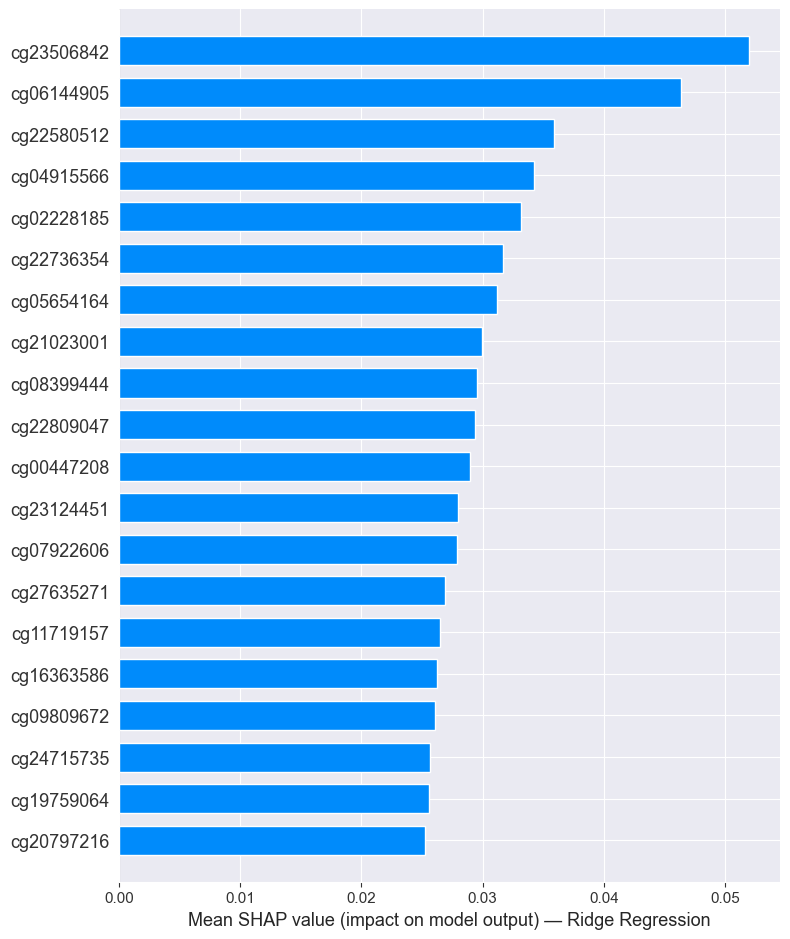

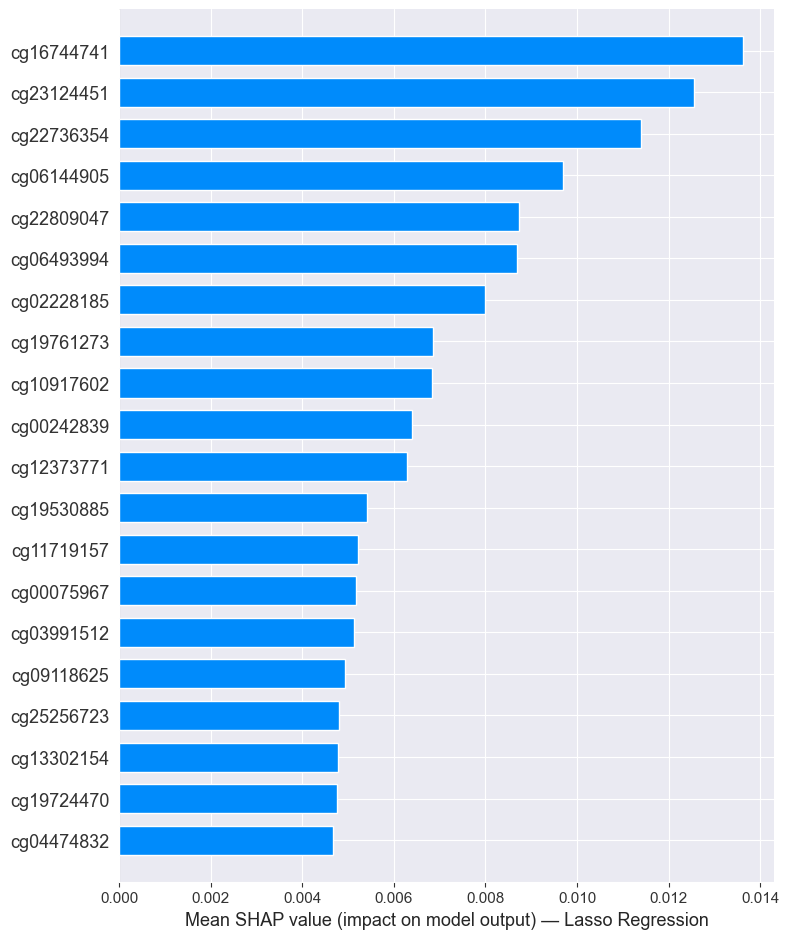

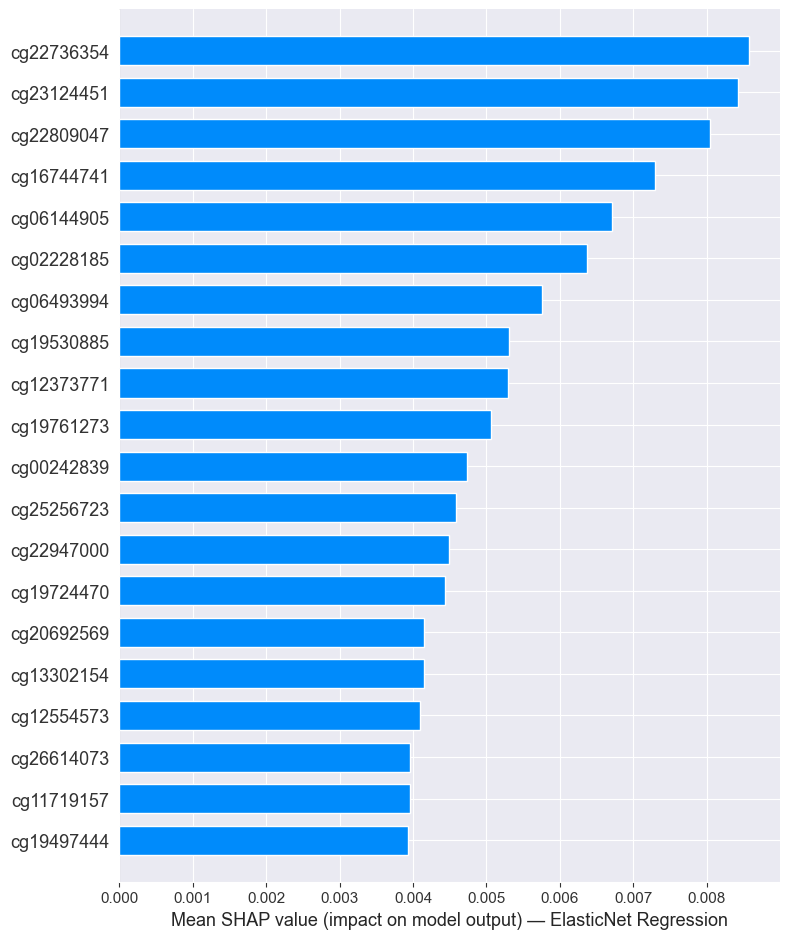

In [86]:
# shap.plots.beeswarm(shap_values)
#
# shap.plots.bar(shap_values)

shap.summary_plot(shap_values_linear, test, plot_type="bar", show=False)
plt.xlabel("Mean SHAP value (impact on model output) — Linear Regression")
plt.show()

shap.summary_plot(shap_values_ridge, test, plot_type="bar", show=False)
plt.xlabel("Mean SHAP value (impact on model output) — Ridge Regression")
plt.show()

shap.summary_plot(shap_values_lasso, test, plot_type="bar", show=False)
plt.xlabel("Mean SHAP value (impact on model output) — Lasso Regression")
plt.show()

shap.summary_plot(shap_values_elasticNet, test, plot_type="bar", show=False)
plt.xlabel("Mean SHAP value (impact on model output) — ElasticNet Regression")
plt.show()


In [ ]:
# Step 1: Evaluate each model
results = []

results.append(evaluate_age_prediction(test_ages, predicted_ages_horvath, model_name="Linear regression", cpg_count=len(train_cols_horvath)))
results.append(evaluate_age_prediction(test_ages, ridgeCV_predictions, model_name="Ridge regression", cpg_count=len(train_cols)))
results.append(evaluate_age_prediction(test_ages, lasso_predictions_scaled, model_name="Lasso regression", cpg_count=np.sum(lasso_scaled.coef_ != 0)))
results.append(evaluate_age_prediction(test_ages, elasticCV_pred_scaled, model_name="ElasticNetCV", cpg_count=np.sum(elastic_cv.coef_ != 0)))

# Step 2: Combine into one DataFrame
all_results = pd.concat(results, ignore_index=True)

# Step 3: Bold best scores
def bold_best(s, maximize=False):
    if maximize:
        is_best = s == s.max()
    else:
        is_best = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_best]

styled_table = (
    all_results.style
    .apply(bold_best, subset=['MAD'], maximize=False)
    .apply(bold_best, subset=['MAE'], maximize=False)
    .apply(bold_best, subset=['MSE'], maximize=False)
    .apply(bold_best, subset=['Pearson R'], maximize=True)
    .apply(bold_best, subset=['Median Error'], maximize=False)
)

styled_table


# Deep learning

In [165]:
train_scaled_ridge = train_scaled[top_array]
test_scaled_ridge = test_scaled[top_array]

train_elastic = train_scaled[elas_cpgs]
test_elastic = test_scaled[elas_cpgs]

np.array(train_scaled_elas)

array([[ 0.68885846, -0.38975604,  0.35214239, ..., -0.02379542,
         0.76494584,  0.91197101],
       [ 0.62903979, -0.32757177,  0.35914432, ...,  0.20439399,
         0.78869659,  0.50591538],
       [ 0.84475033, -0.80162143,  0.69445828, ...,  0.09791317,
         1.10710526,  0.97033917],
       ...,
       [-0.85675108, -0.40750414, -0.8006433 , ...,  0.36746919,
        -0.53817851, -0.18713758],
       [-0.59199364, -1.89581142, -2.39228254, ..., -0.30374548,
        -0.34530258, -2.00236811],
       [-0.95337482, -0.09078835, -0.37791442, ...,  0.38868159,
        -0.58046764,  0.76182467]])

In [166]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

# Assuming you have training data as:
# train (X_train): features (e.g., CpG methylation)
# target (y_train): target values (e.g., chronological age)

# Define the model
model = Sequential([
    Dense(1024, activation='relu', kernel_regularizer=l2(0.001), input_shape=(2551,)),
    Dropout(0.3),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(np.array(train_elastic), np.array(train_ages), validation_split=0.2, epochs=50, batch_size=32)


C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 401.2546 - mae: 13.3137 - val_loss: 135.6545 - val_mae: 8.4561
Epoch 2/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 107.7831 - mae: 7.0949 - val_loss: 129.4079 - val_mae: 8.5339
Epoch 3/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 93.2811 - mae: 6.0658 - val_loss: 145.2723 - val_mae: 9.4445
Epoch 4/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 146.5193 - mae: 6.4541 - val_loss: 207.4440 - val_mae: 11.0878
Epoch 5/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 84.5785 - mae: 6.1636 - val_loss: 219.3775 - val_mae: 12.1121
Epoch 6/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 177.8715 - mae: 6.2092 - val_loss: 204.0214 - val_mae: 11.5791
Epoch 7/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 134.2656 - mae: 6.1853 - val_loss: 258.8332 - val_mae: 13.1805
Epoch 8/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 158.6580 - mae: 6.3980 - val_loss: 225.0541 - val_mae: 11.6256
Epoch 9/50
2

In [167]:
# Predict ages
preds = model.predict(np.array(test_elastic))

#quick view of metrics:
mae = np.median(np.abs(preds - np.array(test_ages)))
mse = np.mean((preds - np.array(test_ages))**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))


171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MAE: 25.599166870117188
MSE: 1249.1940700408209


In [172]:
from keras.layers import Activation, InputLayer, ActivityRegularization, GaussianDropout, GaussianNoise, Embedding, Bidirectional, Input, LSTM, GRU, multiply, Lambda, PReLU, SimpleRNN, Dense, Activation, BatchNormalization, Conv2D, Conv1D, Flatten, LeakyReLU, Dropout, MaxPooling2D, MaxPooling1D, Reshape

coeff = 0.05 * np.sqrt(2.0 * np.log(train_elastic.shape[1]) / train_elastic.shape[0])
noise = 0.1
initializer = tf.keras.initializers.LecunNormal(seed=1)
nn_model = Sequential([
    Input(shape=(2551,), name = 'feature'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, coeff*10),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(np.array(train_elastic), np.array(train_ages), validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 35.6812 - mae: 3.5879 - val_loss: 275.0797 - val_mae: 13.6734
Epoch 2/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 35.0856 - mae: 3.4967 - val_loss: 303.4473 - val_mae: 14.6831
Epoch 3/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 42.2321 - mae: 3.4988 - val_loss: 227.3956 - val_mae: 12.5203
Epoch 4/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 37.8910 - mae: 3.6471 - val_loss: 200.3829 - val_mae: 11.4057
Epoch 5/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 33.9454 - mae: 3.3060 - val_loss: 216.6331 - val_mae: 12.0982
Epoch 6/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 31.8762 - mae: 3.2401 - val_loss: 243.8675 - val_mae: 12.7306
Epoch 7/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 32.0181 - mae: 3.3205 - val_loss: 286.6786 - val_mae: 14.3161
Epoch 8/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 34.5270 - mae: 3.2908 - val_loss: 217.1014 - val_mae: 12.0191
Epoch 9/50
202/2

In [173]:
# Predict ages
preds = model.predict(np.array(test_elastic))

#quick view of metrics:
mae = np.median(np.abs(preds - np.array(test_ages)))
mse = np.mean((preds - np.array(test_ages))**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 25.54782414420022
MSE: 1253.3113345536437


In [200]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, BatchNormalization, GaussianDropout, Activation, ActivityRegularization
from keras.initializers import LecunNormal
from keras import regularizers
import numpy as np
import random
# Load the CSV file
coeff_df = pd.read_csv("../dependencies/horvath_cpg.csv", skiprows=2)  # skip rows for metadata above the header

# Get the list of CpG IDs (excluding the intercept row)
horvath_cpg_list = coeff_df['CpGmarker'].dropna().tolist()
horvath_cpgs = [cpg for cpg in horvath_cpg_list if cpg != '(Intercept)']

train_horvath = all_train[horvath_cpgs]
test_horvath = all_test[horvath_cpgs]

train_cols_horvath = train_horvath.columns
train_index_horvath = train_horvath.index

test_cols_horvath = test_horvath.columns
test_index_horvath = test_horvath.index

scaler_horvath = preprocessing.RobustScaler()

train_horvath_scaled = pd.DataFrame(scaler_horvath.fit_transform(train_horvath), index = train_index_horvath, columns = train_cols_horvath)
test_horvath_scaled = pd.DataFrame(scaler_horvath.transform(test_horvath), index = test_index_horvath, columns = test_cols_horvath)

# Regularization coefficient
coeff = 0.05 * np.sqrt(2.0 * np.log(train_scaled.shape[1]) / train_scaled.shape[0])
noise = 0.1
initializer = LecunNormal(seed=1)

# Neural network architecture
nn_model = Sequential([
    Input(shape=(353,), name='feature'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(coeff*5, coeff*5),
    Dense(32, kernel_initializer=initializer, kernel_regularizer=regularizers.l1_l2(coeff, coeff)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    Dense(32, kernel_initializer=initializer, kernel_regularizer=regularizers.l1_l2(coeff, coeff)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    Dense(32, kernel_initializer=initializer, kernel_regularizer=regularizers.l1_l2(coeff, coeff)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    Dense(32, kernel_initializer=initializer, kernel_regularizer=regularizers.l1_l2(coeff, coeff)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    Dense(32, kernel_initializer=initializer, kernel_regularizer=regularizers.l1_l2(coeff, coeff)),
    Activation('selu'),
    BatchNormalization(),
    Dense(1)
])

# Reproducibility
random.seed(1)
tf.random.set_seed(1)
np.random.seed(1)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                                                 patience=30, min_lr=0.00001)

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)
nn_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train model
history = nn_model.fit(np.array(train_horvath_scaled),
                       np.array(train_ages),
                       batch_size=256,
                       epochs=300,
                       verbose=0)


KeyError: "['cg02654291', 'cg02972551', 'cg09785172', 'cg09869858', 'cg13682722', 'cg16494477', 'cg17408647', 'cg19273182', 'cg19945840', 'cg27319898', 'cg04431054', 'cg05590257', 'cg06117855', 'cg19046959', 'cg19569684', 'cg24471894', 'cg27016307'] not in index"